# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [65]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [66]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

###### Нулевая матрица размера  3×4 ;

In [67]:
# https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
Z = np.zeros((3, 4), int)
display(Z)
print(type(Z))

 

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

<class 'numpy.ndarray'>


###### Диагональная матрица 5×5  с диагональными элементами 1, 2, 3, 4 и 5;

In [68]:
# https://numpy.org/doc/stable/reference/generated/numpy.diag.html
# https://numpy.org/doc/stable/reference/generated/numpy.fill_diagonal.html
Z = np.zeros((5, 5), int)
np.fill_diagonal(Z, [range(1, 6)])
display(Z)
print(type(Z))

 

 

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

<class 'numpy.ndarray'>


###### Посчитал ее след

In [69]:
# https://numpy.org/doc/stable/reference/generated/numpy.trace.html
tr = np.trace(Z)
print(tr, type(tr), sep='\n')

15
<class 'numpy.int64'>



###### Нахожу обратную и проверяю результат

In [70]:
R = np.linalg.inv(Z)
display(R, Z@R, R@Z)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

###### Рандомная матрица 4х5

In [71]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

X = np.random.randint(-5, 5, (4, 5))
X

array([[-1,  2, -4,  4, -3],
       [ 1,  3,  2,  4, -1],
       [ 1,  2,  4, -3,  1],
       [ 2,  1,  3, -2, -2]])

###### определитель минора

In [72]:
sla.det(X[1:3, 0:2])

-1.0

$X^T  X$

In [73]:
X.T@X

array([[  7,   5,  16,  -7,  -1],
       [  5,  18,   9,  12,  -9],
       [ 16,   9,  45, -26,   8],
       [ -7,  12, -26,  45, -15],
       [ -1,  -9,   8, -15,  15]])

============================================

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [74]:
def my_det(Y):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''

    X = Y.copy()
    shape = X.shape
    if shape[0] != shape[1]:
        raise ValueError
    size = shape[0]
    div_det = 1
    det = 1
    for i in range(size - 1):
        s = X[i, i]
        if X[i, i] == 0:
            for _ in range(i + 1, size):
                if _ == size - 1 and X[_, i] == 0:
                    return 0
                if X[_, i] != 0:
                    x_i = X[i, :].copy()
                    X[i, :] = X[_, :]
                    X[_, :] = x_i
                    det *= -1
                    break
        for j in range(i + 1, size):
            if X[j, i] != 0:
                val = X[j, i]
                X[j, :] *= X[i, i]
                div_det *= X[i, i]
                X[j, :] -= val * X[i, :]


    for i in range(size):
        det *= X[i, i]
    return det/div_det

Простая проверка:

In [75]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [76]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')
        
print('done')

done


Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

10
8.91 µs ± 980 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
289 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
100
59.2 µs ± 3.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.24 ms ± 278 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
400
608 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
24.6 ms ± 963 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


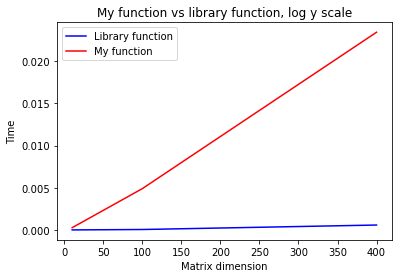

In [77]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 400]
for dim in dimensions:
    print(dim)
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

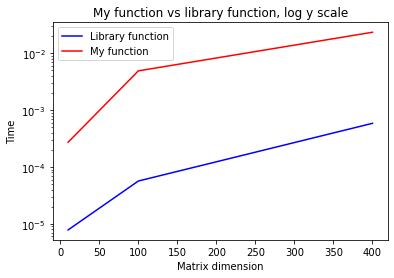

In [78]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [79]:
A1 = np.array([[1, 0], [10**20, 1]])
B1 = np.array([[10**(-20), 1], [0, 1 - 10**20]])
display(A1, B1, A1@B1)

array([[1, 0],
       [100000000000000000000, 1]], dtype=object)

array([[1e-20, 1],
       [0, -99999999999999999999]], dtype=object)

array([[1e-20, 1],
       [1.0, 1]], dtype=object)

In [80]:
A2 = np.array([[1., 0.], [10.**20, 1.]])
B2 = np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])
display(A2, B2, A2@B2)

array([[1.e+00, 0.e+00],
       [1.e+20, 1.e+00]])

array([[ 1.e-20,  1.e+00],
       [ 0.e+00, -1.e+20]])

array([[1.e-20, 1.e+00],
       [1.e+00, 0.e+00]])

In [81]:
display(A1@B1, A2@B2, A1@B1 - A2@B2)

array([[1e-20, 1],
       [1.0, 1]], dtype=object)

array([[1.e-20, 1.e+00],
       [1.e+00, 0.e+00]])

array([[0.0, 0.0],
       [0.0, 1.0]], dtype=object)

И какой из них правильный?

---
**Правильный первый вариант, как видно результат отличается только последним элементом последней строки, проделав вычесления руками, получаем ответ**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [82]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim), float)
    
    for i in range(dim):
        for j in range(dim):
            if i == 0 or j == 0:
                P[i, j] = 1
            else:
                P[i, j] = P[i - 1, j] + P[i, j - 1]
    
    return P



Чему равен её определитель? Строго поясните свой ответ.

----
**Проделаем эл преобразования которые не изменят опрделитель, получим на главной диагонали все 1, и то что она верхнетреугольная => det = 1**

ниже покажу какие именно преобразования

In [83]:
M = my_pascal(7)
s = M.shape[0]
for k in range(s):
    for i in range(s - 1 - 1, k - 1, -1):
        M[i + 1, :] -= M[i, :]

M

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [ 0.,  0.,  1.,  3.,  6., 10., 15.],
       [ 0.,  0.,  0.,  1.,  4., 10., 20.],
       [ 0.,  0.,  0.,  0.,  1.,  5., 15.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.]])

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [84]:
display(my_det(my_pascal(30)))

-239.0

In [85]:
sla.det(my_pascal(30))

2.830041511576755e+49

Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

In [86]:
A = np.array([[1, 1000], [100, 100001]])
b = np.array([[2004], [200402]])
sla.solve(A, b)

array([[4.],
       [2.]])

In [87]:
sla.det(A)

1.0000000000020817

Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [88]:
A = np.array([[1, 1000], [100, 100001]])
b = np.array([[2004.01], [200402]])
print(*sla.solve(A, b))

[1004.01] [1.]


Несмотря на то ,что мы добавили 0.01 к одному из элементов правой части, результат очень сильно изменился

Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [89]:
def my_cond(A):
    '''
    Parameters
    ----------
    A : array_like
    
    Returns
    -------
    cond : float
          Condition number of A.
    '''
    
    # Your code here
    if A.shape[0] != A.shape[1]:
        raise ValueErroe
    m1 = A.T@A
    m2 = (sla.inv(A)).T@(sla.inv(A))
    cond = np.sqrt(np.trace(m1) * np.trace(m2))
    
    return cond

Посчитайте число обусловленности матрицы из задания 3.3.

In [90]:
A = np.array([[1, 1000], [100, 100001]])
my_cond(A)

10001210001.97918

Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

Text(0, 0.5, 'Matrix dimension')

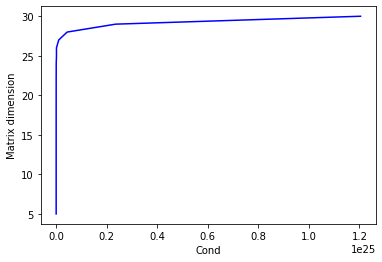

In [91]:
cond = []
dim = []
for i in range(5, 31):
    P = my_pascal(i)
    cond.append(my_cond(P))
    dim.append(i)
    
plt.plot(cond, dim, color='blue', label='cond and dim')

plt.xlabel('Cond')
plt.ylabel('Matrix dimension')

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [92]:
def prod_and_sum(A):
    D = A.diagonal()
    print(f'product is {np.prod(D)}')
    print(f'sum is {D@D}')

In [93]:
A = np.random.randint(-10, 10, (4, 4))
prod_and_sum(A)
A

product is -768
sum is 153


array([[-3, -4, -8, -7],
       [-2, -8,  3,  2],
       [ 9,  0,  8, -6],
       [ 4,  5,  3, -4]])

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [94]:
def f(A, B, lmbd, k):
    n = A.shape[1]
    L = np.zeros((A.shape[0], A.shape[0]), int)
    np.fill_diagonal(L, lmbd)
    A = A@L
    B = B.T
    res = A[0:min(n, k)] @ B[0:min(n, k)]
    return res# Your code here

In [95]:
n = 3
m = 3
k = 3
A = np.random.randint(-5, 5, (m, n))
B = np.random.randint(-5, 5, (m, n))
lmbd = np.random.randint(-5, 5, (1, n))
display(A, B, lmbd)

array([[-2,  0,  3],
       [-1, -5, -1],
       [-1,  3, -4]])

array([[ 2,  4,  0],
       [ 2,  0, -3],
       [-2,  4, -4]])

array([[-3, -3,  0]])

In [96]:
print(f(A, B, lmbd, k))

[[ 12  12 -12]
 [ 66   6  54]
 [-30   6 -42]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [97]:
def get_diag(A, B):
    res = np.einsum('nm, mn ->n', A, B)
    return res

In [98]:
display(A, B, A@B)
print(get_diag(A, B))

array([[-2,  0,  3],
       [-1, -5, -1],
       [-1,  3, -4]])

array([[ 2,  4,  0],
       [ 2,  0, -3],
       [-2,  4, -4]])

array([[-10,   4, -12],
       [-10,  -8,  19],
       [ 12, -20,   7]])

[-10  -8   7]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

In [99]:
from math import cos
from math import sin 
from math import pi

In [100]:
def shrink_rotate(x, a, coef=1., angle=0.):
    v = a + x
    v *= coef
    rot = cos(angle) + 1j*sin(angle)
    v += rot
    return v
    

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).


In [101]:
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    a_c = a.imag
    v = a + x
    v *= coef
    rot = cos(angle) + 1j*sin(angle)
    v += rot
    v_c = v.imag
    v_r = v.real
    dif = a_c - v_c
    v_c = v_c - 2*dif
    v = v_r + v_c * 1j
    return v

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [102]:
def geometric_inverse(x, a, r):
    inv = r**2 / x.conjugate
    inv += a
    return inv

**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

In [103]:
from math import ceil

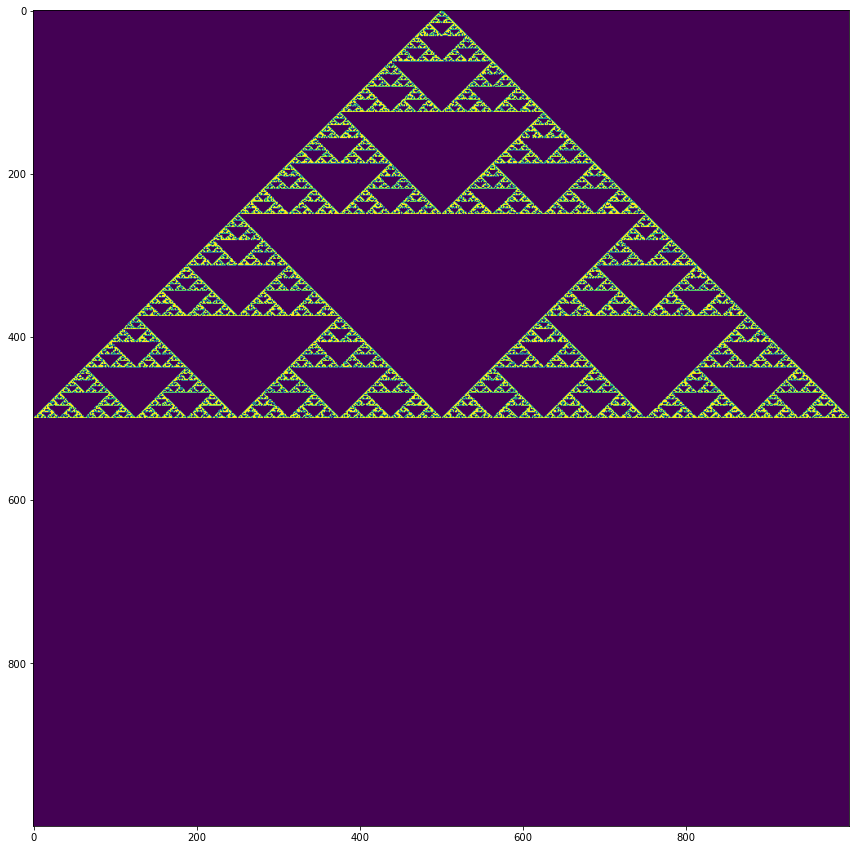

In [104]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

matrix = np.zeros((1000, 1000), int)


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    if n_iter > 10:
        r = z.real
        c = z.imag
        x = ceil((z.real + 1) * 500) %1000
        y = ceil((z.imag + 1) * 500) % 1000
        matrix[-y][x] = 1
        

plt.figure(figsize=(15, 15))
plt.imshow(matrix)

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

Каждый раз когда выбирам 1 из 3 функций рандомно, попадаем либо в верхний треугольник, либо в правый или левый нижнй, и оттуда проделываем такую же операцию, из-за того что функция выбирается рандомно, каждая часть отрисовывается примерно одинаково, тк коеф 0.5 рисунок все уменьшается и уменьшается, так возникает такой фрактал

вот класное видео про этотот же треугольник, где он получается немного другим способом 
https://www.youtube.com/watch?v=Nx3_nX8UoMo&ab_channel=Solipschism


**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

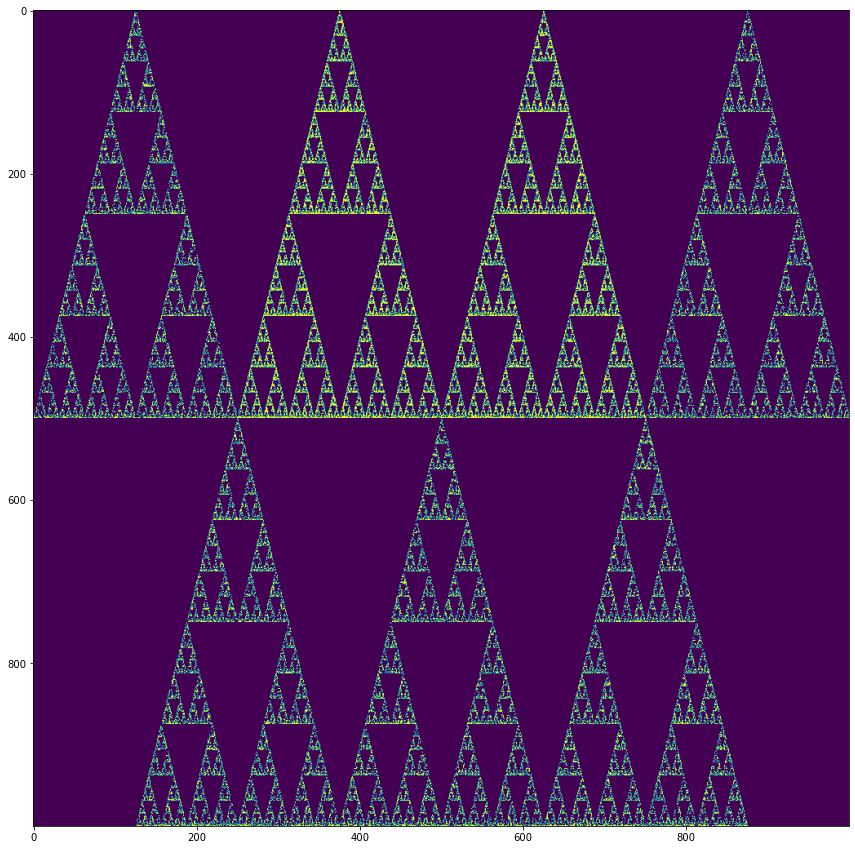

In [105]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*4j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*4j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*4j, coef=0.5, angle=0.))
]

matrix = np.zeros((1000, 1000), int)


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    if n_iter > 10:
        r = z.real
        c = z.imag
        x = ceil((z.real + 1) * 500) %1000
        y = ceil((z.imag + 1) * 500) % 1000
        matrix[-y][x] = 1
        

plt.figure(figsize=(15, 15))
plt.imshow(matrix)

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [106]:
def gauss(A, B):
    try:
        return sla.solve(A, B)
    except:
        pass
    
    
def inv(A, B):
    try:
        inv = 1
        return sla.inv(A)@B
    except:
        pass
    
    
sizes_n = [10, 50, 100, 250, 500, 750, 1000]
sizes_m = [10, 100, 500, 1000, 2000, 5000, 10000]

25.2 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.2 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
63 µs ± 4.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
45 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
134 µs ± 7.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
288 µs ± 64.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
638 µs ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.15 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.72 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.46 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.82 ms ± 477 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.5 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.9 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
31 ms ± 724 µs per loop (mean ± std. dev. of 7 runs, 10 loops 

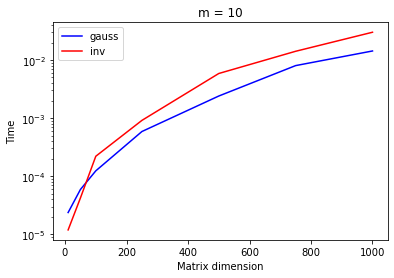

In [107]:
# fixed m = 10
gauss_time = []
inv_time = []
m = 10
for n in sizes_n:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    gauss_res = %timeit -o gauss(A, B)
    inv_res = %timeit -o inv(A, B)
    gauss_time.append(gauss_res.best)
    inv_time.append(inv_res.best)
    
    
plt.semilogy(sizes_n, gauss_time, color='blue', label='gauss')
plt.semilogy(sizes_n, inv_time, color='red', label='inv')
plt.title('m = 10')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

150 µs ± 7.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
260 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
171 µs ± 7.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
244 µs ± 6.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
263 µs ± 2.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
318 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
437 µs ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
423 µs ± 6.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
726 µs ± 9.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
620 µs ± 5.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.88 ms ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.34 ms ± 70.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.2 ms ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.23 ms ± 53.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops

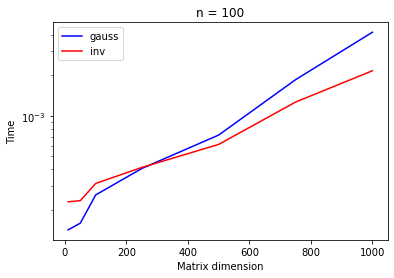

In [108]:
# fixed n = 100
gauss_time = []
inv_time = []
n = 100
for m in sizes_m:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    gauss_res = %timeit -o gauss(A, B)
    inv_res = %timeit -o inv(A, B)
    gauss_time.append(gauss_res.best)
    inv_time.append(inv_res.best)
    
    
plt.semilogy(sizes_n, gauss_time, color='blue', label='gauss')
plt.semilogy(sizes_n, inv_time, color='red', label='inv')
plt.title('n = 100')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

### итоги исследования:
- M фиксированн 

до какого-то момента обратная быстрее, потом побеждает гаусс


- N фиксированн

сначала гаусс быстрее, потом обратная побеждает



###### как такое получается
когда  n - маленькие числа, то обратная ищется легко и умножение на нее тоже меньше  времени относительно гаусса,
но когда n растет, находить оьратнуую и умножать на нее все медленнее , так происходит из-за того, что при каких-то n обратная перестает попадать в кеш 


во втором случае все наооборот 